# Yelp Multi-Label Classification 

Dans cet exercice, nous allons monter en difficulté et essayer d'entrer dans la [compétition Kaggle de Yelp](https://www.kaggle.com/c/yelp-restaurant-photo-classification/overview). Yelp souhaiterait en effet prédire "l'ambiance d'un restaurant" à partir d'une image. On aura les labels suivants à prédire sur l'image : 

* Bien pour les dejeuners
* Bien pour les dîners 
* Prends des réservation 
* Terrasse disponible
* Restaurant est cher ou non
* Sert de l'alcool 
* Sert à Table 
* L'ambiance est classe 
* Bien pour les enfants. 

Au lieu de faire de la classification d'un seul label (i.e chat/chien), cette fois, nous allons devoir placer plusieurs labels sur la même photos. Voyons donc comment nous pouvons résoudre ce challenge avec TensorFlow. 

* Commencez par installer : 
  * --upgrade tensorflow 
  * kaggle 

In [ ]:
!pip install --upgrade tensorflow
!pip install kaggle

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


* Pour la suite, nous allons utiliser l'API de Kaggle pour télécharger des données (trop volumineuses pour le faire autrement)
  * Allez sur l'API de Kaggle et regardez comment télécharger votre fichier `kaggle.json` : [Kaggle API](https://github.com/Kaggle/kaggle-api)
  * Pour la suite, il faut que vous placiez votre `kaggle.json` dans le dossier `/root/.kaggle` de votre Google Colab (ou votre machine en local) 
   * 1. Télécharger le fichier kaggle.json puis l'uploader sur votre collab
   * 2. créer le dossier /root/.kaggle
   * 3. Mettre le fichier kaggle.json dans le dossier /root/.kaggle
   * 4. se rendre à l'adresse [suivante](https://www.kaggle.com/c/yelp-restaurant-photo-classification/rules) et accepter les conditions d'utilisation du dataset
   * 5. Ensuite vous pourrez télécharger les données
  * Essayez de faire cela en utilisant les commandes de votre terminal
  * Voici des rappels 

  <img src="https://i.redd.it/rl0fe7r6zku11.jpg" alt="linux cmd" height=700>

In [ ]:
# Solution 1: on uploade le fichier dans son gdrive avant de le mettre dans le root
# de la machine

#from google.colab import drive
#drive.mount('/content/drive')

# Solution 2: Une fois que vous avez téléchargé le fichier kaggle.json depuis
# votre compte kaggle, vous l'importez dans le notebook en cliquant sur l'icone
# avec un dossier à gauche puis l'icone avec un fichier et une fleche vers le haut
# Une fois effectué, votre fichier kaggle.json sera dans le notebook dans le dossier /content
# On peut le vérifier en lançant les commandes terminal 
# !pwd (liste le path ou on se trouve)
# !ls (liste tous les fichiers présents dans le path ou on se trouve)

!pwd
!ls

/content
kaggle.json  train.csv.tgz	   train_photo_to_biz_ids.csv
ls	     train_photos	   train_photo_to_biz_ids.csv.tgz
sample_data  train_photos.tgz	   train_photo_to_biz_ids.csv.tgz.zip
train.csv    train_photos.tgz.zip


In [ ]:
# Maintenant on va créer un dossier .kaggle qui va contenir nos credentials (kaggle.json)
# à la racine de notre machine, c.a.d dans le repertoire /root. on vérifie que cela a 
# bien fonctionné en essayant de lister les éléments présents dans ce dossier (ls ...), 
# si le dossier n'existe pas le terminal nous retournera une erreur de type "file not exists"
!mkdir /root/.kaggle/
!ls /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
kaggle.json


In [ ]:
# Maintenant on va déplacer le fichier kaggle.json dans le dossier qu'on vient de créer
# Cela va nous permettre d'utiliser l'API kaggle en s'authentifiant directement
#!mv /content/kaggle.json /root/.kaggle/kaggle.json

# Vérifions que cela a bien fonctionné avec un ls
!ls /root/.kaggle

kaggle.json


* Utilisez la commande `!kaggle compitions download -p /content -c yelp-restaurant-photo-classification` pour télécharger tous les éléments
* Cette commande est disponible [ici](https://www.kaggle.com/c/yelp-restaurant-photo-classification/data)

In [ ]:
!kaggle competitions download -p /content -c yelp-restaurant-photo-classification -f train.csv.tgz

train.csv.tgz: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle competitions download -p /content -c yelp-restaurant-photo-classification -f train_photos.tgz 

100% 6.54G/6.55G [02:19<00:00, 35.8MB/s]
100% 6.55G/6.55G [02:19<00:00, 50.5MB/s]


In [ ]:
!kaggle competitions download -p /content -c yelp-restaurant-photo-classification -f train_photo_to_biz_ids.csv.tgz

  0% 0.00/1.12M [00:00<?, ?B/s]
100% 1.12M/1.12M [00:00<00:00, 18.5MB/s]


* En utilisant la commande `!unzip` dezippez les fichiers en `.zip`

In [ ]:
cd /content

/content


In [ ]:
!unzip train_photos.tgz.zip

Archive:  train_photos.tgz.zip
  inflating: train_photos.tgz        


In [ ]:
!unzip train_photo_to_biz_ids.csv.tgz.zip

Usage: tar [OPTION...] [FILE]...
GNU 'tar' saves many files together into a single tape or disk archive, and can
restore individual files from the archive.

Examples:
  tar -cf archive.tar foo bar  # Create archive.tar from files foo and bar.
  tar -tvf archive.tar         # List all files in archive.tar verbosely.
  tar -xf archive.tar          # Extract all files from archive.tar.

 Local file name selection:

      --add-file=FILE        add given FILE to the archive (useful if its name
                             starts with a dash)
  -C, --directory=DIR        change to directory DIR
      --exclude=PATTERN      exclude files, given as a PATTERN
      --exclude-backups      exclude backup and lock files
      --exclude-caches       exclude contents of directories containing
                             CACHEDIR.TAG, except for the tag file itself
      --exclude-caches-all   exclude directories containing CACHEDIR.TAG
      --exclude-caches-under exclude everything under director

* Nous avons à gérer des fichiers en `.tgz`. Utilisez donc la librairie `tarfile` pour pouvoir les décompresser à nouveau. Voici un lien vers la documentation pour vous aider : [Tarfile Documentation](https://www.journaldev.com/17946/python-tarfile-module)

In [ ]:
import tarfile
file = tarfile.open("train_photos.tgz", mode="r:gz")
file.extractall()
file.close()

KeyboardInterrupt: ignored

In [ ]:
file = tarfile.open("train.csv.tgz", mode="r:gz")
file.extractall()
file.close()

In [ ]:
file = tarfile.open("train_photo_to_biz_ids.csv.tgz", mode="r:gz")
file.extractall()
file.close()

* Importez les librairies suivantes : 

  * Pandas 
  * Matplotlib
  * Tensorflow 
  * pathlib
  * from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import pathlib
tf.__version__

'2.3.0'

* Créez une fonction `clean_path_img` qui va :
  * Créer un objet `Path` pour toutes les images ayant une extension `.jpg`
  * Transformer les objets `Path` en `str`
  * Filtrer tous les chemins d'images qui commencent par un `.` (ce sont des images corrompues dans le dataset

In [ ]:
def clean_path_img(path):

  all_images = [img for img in list(path.glob('*')) if img.suffix == ".jpg"]
  all_image_path = [str(img) for img in all_images]
  all_image_path_cleaned = [img for img in all_image_path if img.split("/")[-1][0] != "."]
  
  return all_image_path_cleaned

In [ ]:
# Permet de compter le nombre de fichiers dans le dossier train_photos
!ls train_photos | wc -l

'1'

In [ ]:
path = pathlib.Path("/content/train_photos")
all_image_path_cleaned = clean_path_img(path)
all_image_path_cleaned[:5]

['/content/train_photos/219669.jpg',
 '/content/train_photos/345116.jpg',
 '/content/train_photos/39199.jpg',
 '/content/train_photos/380578.jpg',
 '/content/train_photos/364452.jpg']

* Regardez la taille finale de votre dataset 

In [ ]:
len(all_image_path_cleaned)

234842

* Créez maintenant une fonction `mapping_dataset` qui va: 
  * Lire les deux fichiers `train.csv` & `train_photo_to_biz_ids.csv`
  * Fusionner les deux fichiers 
  * Créer une colonne contenant tous les chemins vers chacune des images correspondant à son label
  * Enlever les NaN 
  * Prendre un sample de 60% des données (pour limiter le temps d'entrainement par la suite) 

In [ ]:
def mapping_dataset(path_1, path_2, on, photo_path, sample_size=1):
  
  df_1 = pd.read_csv(path_1)
  df_2 = pd.read_csv(path_2)

  mapping = pd.merge(df_1, df_2, how="inner", on=on)
  mapping["path"] = mapping.photo_id.apply(lambda x: photo_path+"{}.jpg".format(x))
  mapping = mapping.dropna()

  mapping = mapping.sample(int(sample_size*len(mapping))).reset_index(drop=True)

  return mapping

In [ ]:
  df_1 = pd.read_csv('train.csv')
  df_2 = pd.read_csv('train_photo_to_biz_ids.csv')

In [ ]:
print(df_2.columns)
print(df_1.columns)

Index(['photo_id', 'business_id'], dtype='object')
Index(['business_id', 'labels'], dtype='object')


In [ ]:
mapping = mapping_dataset("train.csv", 
                          "train_photo_to_biz_ids.csv", 
                          "business_id",
                          "/content/train_photos/", 
                          0.3)
mapping.head()

,business_id,labels,photo_id,path
0,2854,0 1 3 5 6 8,99627,/content/train_photos/99627.jpg
1,3261,1 2 3 5 6 7 8,190036,/content/train_photos/190036.jpg
2,846,2 4 5 6 7 8,285142,/content/train_photos/285142.jpg
3,2159,3 6 8,233688,/content/train_photos/233688.jpg
4,2315,1 2 3 4 5 6 7,386623,/content/train_photos/386623.jpg


* Nous allons devoir créer des versions `one_hot_encoder` de nos labels. Pour cela nous allons devoir utiliser le module `MultiLabelBinarizer()` de sklearn. Créer donc une fonction qui va : 
  * Créer une instance de `MultiLabelBinarizer`
  * Fitter l'instance sur les labels de notre dataset 
  * Transformer les labels en une liste de 0 & 1 

In [ ]:
def binarize_data(df):
  mlb = MultiLabelBinarizer()
  labels_list = df.labels.str.split(" ", expand=False)

  # Fit MultiLabelBinarizer
  mlb.fit(labels_list.to_list())
  labels_binarized = mlb.transform(labels_list.to_list())

  return labels_binarized


mapping.labels.str.split(" ", expand=False).to_list()

[['0', '1', '3', '5', '6', '8'],
 ['1', '2', '3', '5', '6', '7', '8'],
 ['2', '4', '5', '6', '7', '8'],
 ['3', '6', '8'],
 ['1', '2', '3', '4', '5', '6', '7'],
 ['1', '2', '4', '5', '6', '7'],
 ['1', '2', '3', '4', '5', '6'],
 ['1', '2', '4', '5', '6', '7'],
 ['1', '2', '3', '4', '5', '6'],
 ['1', '2', '4', '5', '6', '7'],
 ['0', '2', '3', '6', '8'],
 ['3', '5', '6', '8'],
 ['2', '3', '5', '6'],
 ['0', '8'],
 ['1', '2', '4', '5', '6', '7'],
 ['0', '3', '8'],
 ['0', '3', '8'],
 ['1', '2', '3', '4', '5', '6', '7', '8'],
 ['1', '2', '5', '6', '8'],
 ['1', '2', '4', '5', '6'],
 ['0', '3', '8'],
 ['1', '2', '4', '5', '6', '7', '8'],
 ['1', '2', '3', '4', '5', '6', '7', '8'],
 ['1', '2', '3', '5', '6', '7', '8'],
 ['6', '8'],
 ['1', '2', '4', '5', '6'],
 ['8'],
 ['1', '2', '3', '4', '5', '6', '7'],
 ['1', '2', '5', '6', '8'],
 ['1', '2', '3', '5', '6'],
 ['3', '8'],
 ['0', '2', '3', '5', '6', '8'],
 ['1', '2', '4', '5', '6', '7'],
 ['1', '2', '4', '5', '6', '7'],
 ['1', '2', '3', '4', '5', '

In [ ]:
# Chaque ligne de notre array labels_binarized est un array qui correspond au label d'une image.
# par exemple l'array [0, 0, 0, 1, 0, 0, 0, 0, 1] signifie que l'image correspondante contient les labels 3 et 8
labels_binarized = binarize_data(mapping)
labels_binarized[:5]

array([[0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 0, 1]])

* Si vous faites une boucles sur les 10 premiers éléments, vous pourrez donc trouver les labels correspondant à chacun des chemins de vos images. 

In [ ]:
for i in range(10):
  print(mapping.path[i], labels_binarized[i])

NameError: ignored

# TensorFlow Dataset 

Nous allons passer à la création du dataset TensorFlow 

* Créez une fonction `parse_function` qui va 
  * Lire les chemins de chaque image 
  * Décoder les images 
  * Retailler les images en (224, 224, 3)
  * Divisez les tenseurs par 255

In [ ]:
@tf.function
def parse_function(img, labels):

  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [224, 224])
  img = img / 255.0
  
  return img, labels 

* Créez un `tf.data.Dataset` contenant vos chemins d'images et vos labels correspondants

In [ ]:
full_ds = tf.data.Dataset.from_tensor_slices((mapping.path.values, labels_binarized))

In [ ]:
for x, y in full_ds.take(1):
  print(x, y)

tf.Tensor(b'/content/train_photos/220674.jpg', shape=(), dtype=string) tf.Tensor([0 0 0 1 0 0 0 0 1], shape=(9,), dtype=int64)


* Appliquez ensuite votre fonction `parse_function`

In [ ]:
full_ds = full_ds.map(parse_function)

* Visualisez la première image de votre dataset 

tf.Tensor([0 0 0 1 0 0 0 0 1], shape=(9,), dtype=int64)


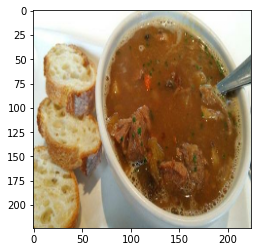

In [ ]:
for x, y in full_ds.take(1):
  plt.imshow(x)
  print(y)

* Créez des batchs de 64 dans votre dataset d'entrainement

In [ ]:
BATCH_SIZE = 64
full_ds = full_ds.batch(BATCH_SIZE)

* Faites un train / test split 

In [ ]:
# Train / Test split 
split = int(0.75*len(mapping)/BATCH_SIZE)

train_set = full_ds.take(split)
test_set = full_ds.skip(split)

* Regardez une image sur votre `Train` pour être sur que tout est okay 

tf.Tensor([64  9], shape=(2,), dtype=int32)


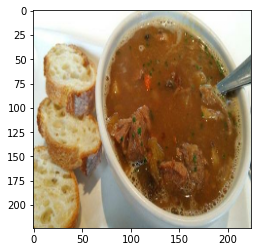

In [ ]:
for x, y in train_set.take(1):
  plt.imshow(x[0])
  print(tf.shape(y))

# Model Architecture

* Créez une instance de `tf.distribute.MirrorStrategy`. C'est un moyen d'accélerer notre computing.

In [ ]:
#import tensorflow as tf
# Distributed Strategy
strategy = tf.distribute.MirroredStrategy()
print("Number of replicas in sync: {}".format(strategy.num_replicas_in_sync))

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of replicas in sync: 1


* Créez un modèle pré-entrainé MobileNetV2 que vous adapterez à votre dataset. Vous devrez envelopper d'un contexte `strategy.scope()`. I.e 
```
with strategy.scope():

  YOUR MODEL ARCHITECTURE

  YOUR LEARNING RATE SCHEDULER

  YOUR COMPILER

```

In [ ]:
with strategy.scope():
  base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )
  
  base_model.trainable = False

  model = tf.keras.Sequential([
      base_model,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dense(524, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(124, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(9, activation="sigmoid")
  ])

  # Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
  initial_learning_rate = 0.0001

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate,
      decay_steps=2000,
      decay_rate=0.90,
      staircase=True)
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

In [ ]:
model.trainable_weights

[MirroredVariable:{
   0: <tf.Variable 'dense/kernel:0' shape=(1280, 1024) dtype=float32, numpy=
 array([[ 0.02258448,  0.01448158, -0.00802983, ...,  0.03101818,
          0.04230285, -0.04606204],
        [ 0.03330795, -0.01508409, -0.0051165 , ..., -0.00989623,
          0.02415139,  0.01334747],
        [ 0.00235423, -0.03139581, -0.01620579, ...,  0.00112811,
         -0.01867373,  0.04043901],
        ...,
        [ 0.04796403, -0.00994291,  0.0373853 , ...,  0.03295147,
         -0.0230675 , -0.0184386 ],
        [-0.03715787,  0.04655666, -0.00401958, ..., -0.00815739,
         -0.02561367,  0.05020844],
        [-0.02894389,  0.04147518,  0.02319495, ...,  0.01500867,
         -0.02460559, -0.03435538]], dtype=float32)>
 }, MirroredVariable:{
   0: <tf.Variable 'dense/bias:0' shape=(1024,) dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>
 }, MirroredVariable:{
   0: <tf.Variable 'dense_1/kernel:0' shape=(1024, 524) dtype=float32, numpy=
 array([[ 0.022

* Fittez votre modèle sur 5 à 10 epochs 

ATTENTION : Cet entrainement sera long ! (environs 5 min / epochs)

In [ ]:
history = model.fit(train_set,
                    validation_data=test_set,
                    epochs=100)

Epoch 1/100
824/824 [==============================] - 287s 348ms/step - loss: 656845248.0000 - categorical_accuracy: 0.0372 - val_loss: 4177004032.0000 - val_categorical_accuracy: 0.0211
Epoch 2/100
824/824 [==============================] - 289s 351ms/step - loss: 39789383680.0000 - categorical_accuracy: 0.0381 - val_loss: 99019014144.0000 - val_categorical_accuracy: 0.0233
Epoch 3/100
824/824 [==============================] - 284s 345ms/step - loss: 171596775424.0000 - categorical_accuracy: 0.0384 - val_loss: 217497960448.0000 - val_categorical_accuracy: 0.0363
Epoch 4/100
824/824 [==============================] - 287s 349ms/step - loss: 106174054400.0000 - categorical_accuracy: 0.0599 - val_loss: 26987751424.0000 - val_categorical_accuracy: 0.0363
Epoch 5/100
824/824 [==============================] - 286s 347ms/step - loss: 32572076032.0000 - categorical_accuracy: 0.1041 - val_loss: 52576292864.0000 - val_categorical_accuracy: 0.0623
Epoch 6/100
824/824 [========================

* Visualisez votre accuracy par rapport à vos epochs sur votre train & test

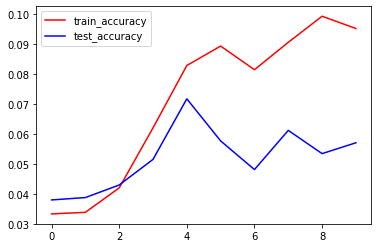

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

* Faites de même avec votre loss

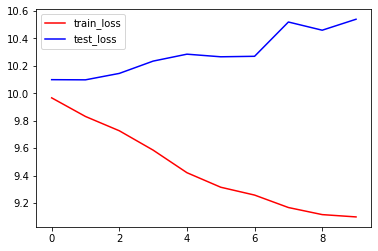

In [ ]:
# Visualise train / Valid Loss
plt.plot(history.history["loss"], c="r", label="train_loss")
plt.plot(history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

* Dégelez les 50 dernières couches de votre modèle 

In [ ]:
base_model.trainable = True
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

* Recompilez votre modèle 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
            loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
            metrics = [tf.keras.metrics.CategoricalAccuracy()])

* Entrainez à nouveau votre modèle sur 5 à 10 epochs 

In [ ]:
history = model.fit(train_set,
                    validation_data=test_set,
                    epochs=10)

Train for 824 steps, validate for 276 steps
Epoch 1/10
824/824 [==============================] - 311s 377ms/step - loss: 9.1924 - categorical_accuracy: 0.0946 - val_loss: 10.3365 - val_categorical_accuracy: 0.0411
Epoch 2/10
824/824 [==============================] - 305s 370ms/step - loss: 9.1375 - categorical_accuracy: 0.0749 - val_loss: 10.3288 - val_categorical_accuracy: 0.0462
Epoch 3/10
824/824 [==============================] - 262s 319ms/step - loss: 8.9491 - categorical_accuracy: 0.0985


KeyboardInterrupt: ignored

* Faites vos visualisations 

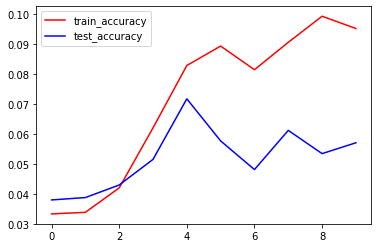

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

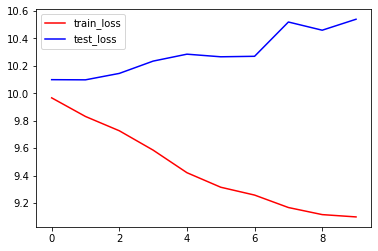

In [ ]:
# Visualise train / Valid Loss
plt.plot(history.history["loss"], c="r", label="train_loss")
plt.plot(history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()

* Regardez un exemple de prédictions par rapport à la réalité 

Preds : [[5.76355169e-03 8.10269952e-01 8.18216681e-01 2.20609382e-01
  8.26897323e-01 8.87685359e-01 9.09323573e-01 6.21288121e-01
  1.86799973e-01]
 [5.97681338e-03 1.22407518e-01 1.53987706e-01 4.36927043e-02
  1.45531848e-01 3.99268299e-01 8.24838221e-01 2.20916197e-02
  8.86870921e-01]
 [6.63592696e-01 8.37993324e-02 3.27355742e-01 6.88536465e-01
  3.83680244e-03 2.61096150e-01 3.34949732e-01 2.08177976e-02
  9.03036714e-01]
 [4.92751986e-01 2.47997180e-01 5.30289471e-01 6.34881794e-01
  3.85337994e-02 7.47867107e-01 7.44807839e-01 1.11960173e-01
  4.48496759e-01]
 [7.66871381e-04 7.10754022e-02 4.36163545e-01 2.25824550e-01
  4.61604416e-01 6.01840854e-01 8.24751019e-01 2.37891719e-01
  3.99948269e-01]
 [4.56622010e-03 8.74551892e-01 9.29242969e-01 5.49611509e-01
  6.71292007e-01 9.31284547e-01 9.61085379e-01 2.57293165e-01
  1.55432979e-02]
 [2.76422203e-02 5.81419617e-02 4.17620510e-01 8.62708151e-01
  3.47598791e-02 8.78928721e-01 8.55695903e-01 1.22436911e-01
  8.31468701e-01

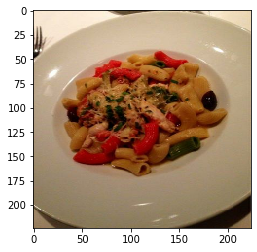

In [ ]:
for x, y in test_set.take(1):
  y_pred = model.predict(x)
  print("Preds : {}\nTruth : {}".format(y_pred[0], y[0].numpy()))
  plt.imshow(x[0])

# Pour aller plus loin 

* [Multi-Label Image Classification in TensorFlow 2.0.ipynb](https://github.com/ashrefm/multi-label-soft-f1/blob/master/Multi-Label%20Image%20Classification%20in%20TensorFlow%202.0.ipynb)

* [Kaggle API](https://github.com/Kaggle/kaggle-api)